# Damped-Local-Trend(DLT) Example

In [1]:
import pandas as pd
import numpy as np
from uTS.dlt import DLT
from uTS.utils.utils import plot_predicted_data

## Data

In [2]:
DATA_FILE = "./data/iclaims.example.csv"

In [3]:
raw_df = pd.read_csv(DATA_FILE, parse_dates=['week'])

In [4]:
raw_df.dtypes

week              datetime64[ns]
claims                     int64
trend.unemploy           float64
trend.filling            float64
trend.job                float64
dtype: object

### Data Transformation

In [5]:
df=raw_df.copy()
df[['claims', 'trend.unemploy', 'trend.filling', 'trend.job']] = \
    df[['claims', 'trend.unemploy', 'trend.filling', 'trend.job']].apply(np.log, axis=1)
df.head(5)

,week,claims,trend.unemploy,trend.filling,trend.job
0,2010-01-03,13.386595,0.168876,-0.328309,0.113033
1,2010-01-10,13.624218,0.168876,-0.204695,0.164326
2,2010-01-17,13.398741,0.185136,-0.302334,0.113033
3,2010-01-24,13.137549,0.152346,-0.204695,0.102451
4,2010-01-31,13.196760,0.083354,-0.252323,0.070016


### Train / Test Split

In [6]:
test_size=52
train_df=df[:-test_size]

# in uTS we make assertion that test dates need to be between train start/end
test_df=df[-test_size:]

## MAP Fit and Predict

In [7]:
dlt_map=DLT(
    response_col='claims',
    date_col='week',
    seasonality=52,
    seed=8888,
    predict_method='map'
)

In [8]:
dlt_map.fit(df=train_df)

In [9]:
dlt_map.aggregated_posteriors

{'mean': None,
 'median': None,
 'map': {'l': array([[13.91721278, 13.91710301, 13.91883923, 13.91755996, 13.92050022,
          13.92288525, 13.92467963, 13.92798631, 13.93185834, 13.93160309,
          13.93271913, 13.93305024, 13.93271572, 13.93370174, 13.93352472,
          13.9312205 , 13.92876132, 13.92754589, 13.92543672, 13.92600444,
          13.92473226, 13.92356706, 13.92258178, 13.92256958, 13.92124674,
          13.92120273, 13.92249326, 13.92235751, 13.9215267 , 13.92348865,
          13.92748239, 13.93132547, 13.93277604, 13.93167221, 13.93091176,
          13.92891319, 13.92468743, 13.92261923, 13.92276761, 13.92238598,
          13.92232636, 13.91887448, 13.91608267, 13.91560751, 13.91492382,
          13.91329904, 13.91009666, 13.90805888, 13.90746017, 13.9063091 ,
          13.90695004, 13.90347575, 13.90478622, 13.9128603 , 13.90504618,
          13.91575703, 13.91267822, 13.90972486, 13.91038175, 13.90416686,
          13.88480551, 13.88915637, 13.88822441, 13.8890

In [10]:
predicted_df = dlt_map.predict(df=test_df)

In [11]:
dlt_map._posterior_state

{'l': array([[13.91721278, 13.91710301, 13.91883923, 13.91755996, 13.92050022,
         13.92288525, 13.92467963, 13.92798631, 13.93185834, 13.93160309,
         13.93271913, 13.93305024, 13.93271572, 13.93370174, 13.93352472,
         13.9312205 , 13.92876132, 13.92754589, 13.92543672, 13.92600444,
         13.92473226, 13.92356706, 13.92258178, 13.92256958, 13.92124674,
         13.92120273, 13.92249326, 13.92235751, 13.9215267 , 13.92348865,
         13.92748239, 13.93132547, 13.93277604, 13.93167221, 13.93091176,
         13.92891319, 13.92468743, 13.92261923, 13.92276761, 13.92238598,
         13.92232636, 13.91887448, 13.91608267, 13.91560751, 13.91492382,
         13.91329904, 13.91009666, 13.90805888, 13.90746017, 13.9063091 ,
         13.90695004, 13.90347575, 13.90478622, 13.9128603 , 13.90504618,
         13.91575703, 13.91267822, 13.90972486, 13.91038175, 13.90416686,
         13.88480551, 13.88915637, 13.88822441, 13.88905404, 13.89079376,
         13.8887158 , 13.89146901

In [12]:
predicted_df.head(5)

,week,prediction
0,2017-07-02,12.425010
1,2017-07-09,12.545258
2,2017-07-16,12.382638
3,2017-07-23,12.236157
4,2017-07-30,12.189419


/Users/edwinng/work/venv/env3_uTS/lib/python3.6/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


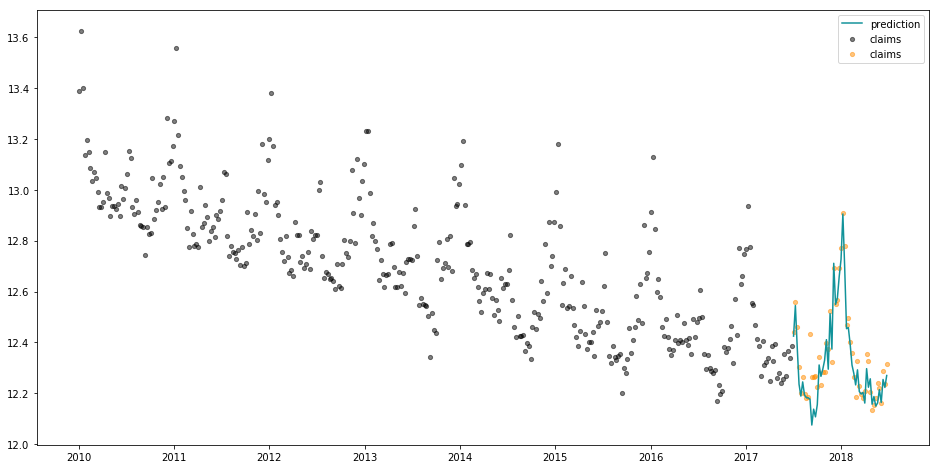

In [13]:
plot_predicted_data(training_actual_df=train_df, predicted_df=predicted_df, 
                    date_col=dlt_map.date_col, actual_col=dlt_map.response_col, pred_col='prediction', 
                    test_actual_df=test_df)

## MCMC Fit and Predict

In [14]:
dlt_mcmc = DLT(
    response_col='claims',
    date_col='week',
    seasonality=52,
    num_warmup=4000, 
    num_sample=500,
    sample_method='mcmc',
    predict_method='full',
    n_bootstrap_draws=500,
    damped_factor_fixed=-1
)

In [15]:
dlt_mcmc.fit(df=train_df)

To run all diagnostics call pystan.check_hmc_diagnostics(fit)


In [16]:
dlt_mcmc.aggregated_posteriors['mean']

{'l': array([[2068784.60532631, 2068784.60553891, 2068784.60666529,
         2068784.60578213, 2068784.60754391, 2068784.6089386 ,
         2068784.60962987, 2068784.61162025, 2068784.6142215 ,
         2068784.61390168, 2068784.61403085, 2068784.61391169,
         2068784.61340331, 2068784.61356391, 2068784.61335486,
         2068784.61142183, 2068784.60976626, 2068784.60759827,
         2068784.60572123, 2068784.60571778, 2068784.60424439,
         2068784.60314242, 2068784.6018533 , 2068784.60176393,
         2068784.60008518, 2068784.59970091, 2068784.60023476,
         2068784.59984715, 2068784.59912728, 2068784.5997158 ,
         2068784.60156945, 2068784.60361269, 2068784.60373237,
         2068784.60260912, 2068784.60174009, 2068784.60027196,
         2068784.59675747, 2068784.59513544, 2068784.59441023,
         2068784.5937499 , 2068784.59362656, 2068784.59125357,
         2068784.58985548, 2068784.58952484, 2068784.58894713,
         2068784.58776534, 2068784.58590667, 20687

In [20]:
predicted_df = dlt_mcmc.predict(df=test_df)

In [21]:
predicted_df.tail(5)

,week,5,50,95
47,2018-05-27,12.119192,12.234245,12.357694
48,2018-06-03,12.059281,12.170534,12.301666
49,2018-06-10,12.151751,12.273367,12.383103
50,2018-06-17,12.110775,12.239982,12.354864
51,2018-06-24,12.165590,12.290415,12.402240


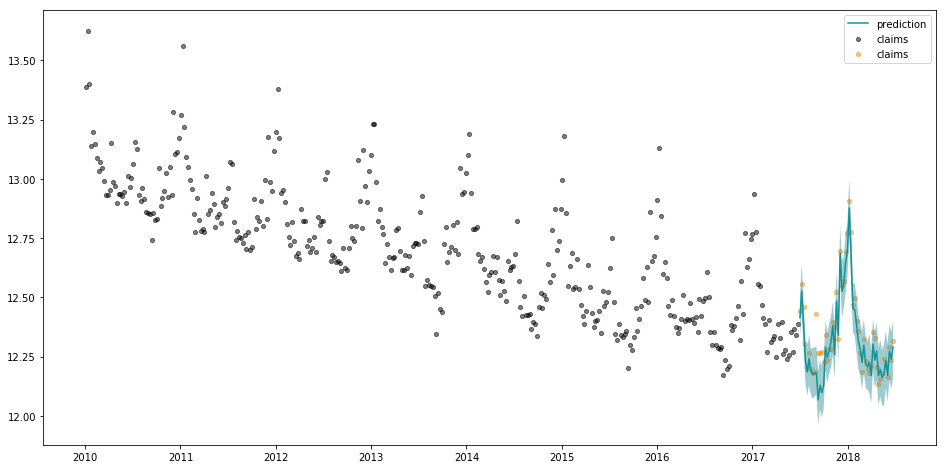

In [22]:
plot_predicted_data(training_actual_df=train_df, predicted_df=predicted_df, 
                    date_col=dlt_mcmc.date_col, actual_col=dlt_mcmc.response_col, pred_col=50, 
                    pred_quantiles_col=[5,95], test_actual_df=test_df)

## Mean Fit and Predict Decomp

In [24]:
dlt_mean=DLT(
    response_col='claims',
    date_col='week',
    seasonality=52,
    seed=8888,
    predict_method='mean'
)

In [25]:
dlt_mean.fit(df=train_df)

To run all diagnostics call pystan.check_hmc_diagnostics(fit)


In [26]:
predicted_df = dlt_mean.predict(df=test_df, decompose=True)

TypeError: 'NoneType' object is not subscriptable

In [ ]:
predicted_df.head(5)

In [ ]:
plot_predicted_data(training_actual_df=train_df, predicted_df=predicted_df, 
                    date_col=dlt_mean.date_col, actual_col=dlt_mean.response_col, pred_col='prediction', 
                    test_actual_df=test_df)

## MAP Fit and Decomp with Regression

In [22]:
dlt_reg=LGT(
    response_col='claims',
    regressor_col=['trend.unemploy', 'trend.filling'],
    date_col='week',
    seasonality=52,
    seed=8888,
    predict_method='map'
)

In [23]:
dlt_reg.fit(df=train_df)

In [24]:
predicted_df = dlt_reg.predict(df=test_df, decompose=True)

In [25]:
predicted_df.head(5)

,week,prediction,trend,seasonality,regression
0,2017-07-02,12.412338,12.451823,-0.054176,0.014691
1,2017-07-09,12.526810,12.448625,0.067583,0.010603
2,2017-07-16,12.369013,12.446739,-0.088252,0.010526
3,2017-07-23,12.220285,12.444948,-0.231638,0.006975
4,2017-07-30,12.180411,12.443165,-0.271892,0.009138
